In [1]:
### 한글 폰트 설정
import matplotlib
from matplotlib import font_manager, rc
import matplotlib.pyplot as plt
import platform

path = "C:/Windows/Fonts/malgun.ttf"
if platform.system() == "Windows":
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
elif platform.system()=="Darwin":
    rc('font', family='AppleGothic')
else:
    print("Unknown System")
    
matplotlib.rcParams['axes.unicode_minus'] = False

%matplotlib inline

In [3]:
import mglearn
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

%matplotlib inline

C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


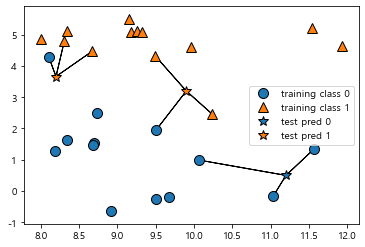

In [4]:
mglearn.plots.plot_knn_classification(n_neighbors=3)

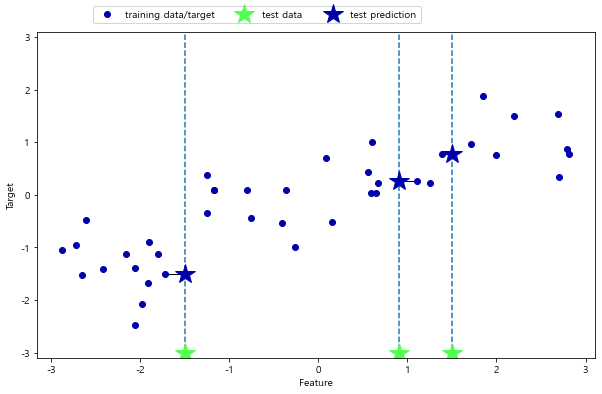

In [5]:
mglearn.plots.plot_knn_regression(n_neighbors=1)

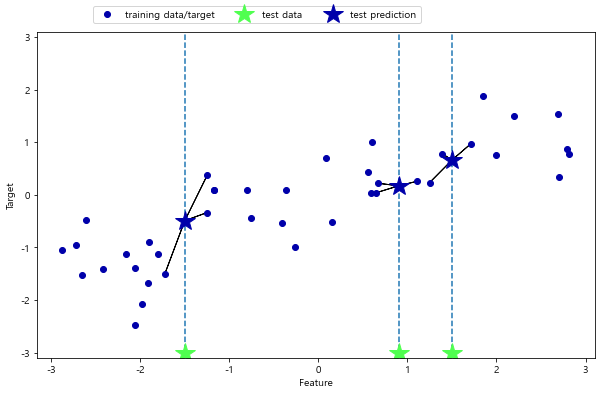

In [6]:
mglearn.plots.plot_knn_regression(n_neighbors=3)

In [7]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

In [8]:
X, y = mglearn.datasets.make_forge()

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                             random_state=0)

C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


In [9]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((19, 2), (7, 2), (19,), (7,))

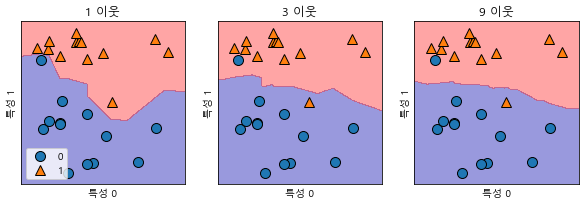

In [10]:
fig, axes = plt.subplots(1, 3, figsize=(10, 3))

for n_neighbors, ax in zip([1, 3, 9], axes):
    # fit 메소드는 self 오브젝트를 리턴합니다
    # 그래서 객체 생성과 fit 메소드를 한 줄에 쓸 수 있습니다
    model = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X, y)
    mglearn.plots.plot_2d_separator(model, X, 
                                    fill=True, eps=0.5, ax=ax, alpha=.4)
    
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title("{} 이웃".format(n_neighbors))
    ax.set_xlabel("특성 0")
    ax.set_ylabel("특성 1")
axes[0].legend(loc=3)

In [11]:
from sklearn.datasets import load_breast_cancer
import matplotlib.pyplot as plt

In [12]:
cancer = load_breast_cancer()
print("cancer.keys() : \n{}".format(cancer.keys()))
print("유방암 데이터의 행열 : {}".format(cancer.data.shape))

cancer.keys() : 
dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])
유방암 데이터의 행열 : (569, 30)


In [13]:
print("특성이름(featuer_names) : {}".format(cancer['feature_names']))
print("유방암 데이터의 형태 : ", cancer.data.shape)
print()
print("클래스 이름(target_names) : {}".format(cancer['target_names']))
print("클래스별 샘플 개수 : \n",np.bincount(cancer.target))

특성이름(featuer_names) : ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
유방암 데이터의 형태 :  (569, 30)

클래스 이름(target_names) : ['malignant' 'benign']
클래스별 샘플 개수 : 
 [212 357]


In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X = cancer.data
y = cancer.target

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                         stratify=cancer.target,     
                                         random_state=77)

In [16]:
print( len(y_train) )
y_1_all = (y == 1).sum() 
y_0_all =  (y == 0).sum() 

print(f"target y의 \n 0의 개수 : {y_0_all} \n 1의 개수 : {y_1_all}")

426
target y의 
 0의 개수 : 212 
 1의 개수 : 357


In [17]:
y_train_1 = (y_train == 1).sum()
y_test_1 = (y_test == 1).sum()

y_train_0 = len(y_train) - (y_train == 1).sum()
y_test_0 = len(y_test) - (y_test == 1).sum()

print("데이터 셋의 target(학습:테스트)의 비율 - 1에 대해서")
print(f"train비율 : {y_train_1/y_1_all}, test비율 : {y_test_1/y_1_all}")

print("데이터 셋의 target(학습:테스트)의 비율 - 0에 대해서")
print(f"train비율 : {y_train_0/y_0_all}, test비율 : {y_test_0/y_0_all}")

데이터 셋의 target(학습:테스트)의 비율 - 1에 대해서
train비율 : 0.7478991596638656, test비율 : 0.25210084033613445
데이터 셋의 target(학습:테스트)의 비율 - 0에 대해서
train비율 : 0.75, test비율 : 0.25


In [41]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=5)   #모델 선택
model.fit(X_train, y_train)
pred = model.predict(X_test)
pred

array([1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1])

In [42]:
(pred == y_test).sum()/(len(pred)) * 100

91.6083916083916

In [43]:
acc_tr = model.score(X_train, y_train)   # 정확도(학습용 데이터)
acc_test = model.score(X_test, y_test)   # 정확도(테스트 데이터)
acc_tr, acc_test       #k=1, 이러한 경우 과대 적합, 두 정확도 차이가 남
                        

(0.9530516431924883, 0.916083916083916)

In [44]:
print("k : {}".format(3))
print("훈련 데이터셋 정확도 : {:.2f}".format(acc_tr))
print("테스트 데이터 셋 정확도 : {:.2f}".format(acc_test))

k : 3
훈련 데이터셋 정확도 : 0.95
테스트 데이터 셋 정확도 : 0.92


In [45]:
k_list = []
tr_acc = []
test_acc = []
k_nums = range(1, 22, 2)# 1,3,5~21

for n in k_nums:
    # 모델 선택 및 학습 
    model = KNeighborsClassifier(n_neighbors=n)
    model.fit(X_train, y_train)
    
    # 정확도 구하기 
    acc_tr = model.score(X_train, y_train)
    acc_test = model.score(X_test, y_test)
    
    # 정확도 값 저장.
    k_list.append(n)
    tr_acc.append(acc_tr)
    test_acc.append(acc_test)
    
    print("k : ", n)
    print("학습용셋 정확도 {:.3f}".format(acc_tr) )
    print("테스트용셋 정확도 {:.3f}".format(acc_test) )

k :  1
학습용셋 정확도 1.000
테스트용셋 정확도 0.888
k :  3
학습용셋 정확도 0.955
테스트용셋 정확도 0.909
k :  5
학습용셋 정확도 0.953
테스트용셋 정확도 0.916
k :  7
학습용셋 정확도 0.953
테스트용셋 정확도 0.909
k :  9
학습용셋 정확도 0.946
테스트용셋 정확도 0.909
k :  11
학습용셋 정확도 0.939
테스트용셋 정확도 0.909
k :  13
학습용셋 정확도 0.937
테스트용셋 정확도 0.916
k :  15
학습용셋 정확도 0.939
테스트용셋 정확도 0.916
k :  17
학습용셋 정확도 0.934
테스트용셋 정확도 0.923
k :  19
학습용셋 정확도 0.937
테스트용셋 정확도 0.923
k :  21
학습용셋 정확도 0.934
테스트용셋 정확도 0.923


In [47]:
import seaborn as sns
print(sns.__version__)

0.11.0


In [48]:
# tr_acc = []
# test_acc = []
dat = { "tr_acc":tr_acc, "test_acc":test_acc }
data_df = pd.DataFrame(dat, index=k_list)
data_df

,tr_acc,test_acc
1,1.000000,0.888112
3,0.955399,0.909091
5,0.953052,0.916084
7,0.953052,0.909091
9,0.946009,0.909091
11,0.938967,0.909091
13,0.936620,0.916084
15,0.938967,0.916084
17,0.934272,0.923077
19,0.936620,0.923077


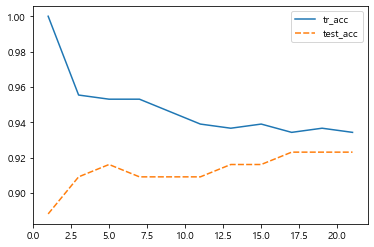

In [49]:
sns.lineplot(data=data_df, palette="tab10")
plt.show()

In [50]:
k_list = []
tr_acc = []
test_acc = []
k_nums = range(1, 100, 1)# 1,3,5~21

for n in k_nums:
    # 모델 선택 및 학습 
    model = KNeighborsClassifier(n_neighbors=n)
    model.fit(X_train, y_train)
    
    # 정확도 구하기 
    acc_tr = model.score(X_train, y_train)
    acc_test = model.score(X_test, y_test)
    
    # 정확도 값 저장.
    k_list.append(n)
    tr_acc.append(acc_tr)
    test_acc.append(acc_test)
    
    print("k : ", n)
    print("학습용셋 정확도 {:.3f}".format(acc_tr) )
    print("테스트용셋 정확도 {:.3f}".format(acc_test) )

k :  1
학습용셋 정확도 1.000
테스트용셋 정확도 0.888
k :  2
학습용셋 정확도 0.974
테스트용셋 정확도 0.902
k :  3
학습용셋 정확도 0.955
테스트용셋 정확도 0.909
k :  4
학습용셋 정확도 0.953
테스트용셋 정확도 0.902
k :  5
학습용셋 정확도 0.953
테스트용셋 정확도 0.916
k :  6
학습용셋 정확도 0.955
테스트용셋 정확도 0.902
k :  7
학습용셋 정확도 0.953
테스트용셋 정확도 0.909
k :  8
학습용셋 정확도 0.948
테스트용셋 정확도 0.909
k :  9
학습용셋 정확도 0.946
테스트용셋 정확도 0.909
k :  10
학습용셋 정확도 0.944
테스트용셋 정확도 0.909
k :  11
학습용셋 정확도 0.939
테스트용셋 정확도 0.909
k :  12
학습용셋 정확도 0.944
테스트용셋 정확도 0.909
k :  13
학습용셋 정확도 0.937
테스트용셋 정확도 0.916
k :  14
학습용셋 정확도 0.941
테스트용셋 정확도 0.916
k :  15
학습용셋 정확도 0.939
테스트용셋 정확도 0.916
k :  16
학습용셋 정확도 0.937
테스트용셋 정확도 0.916
k :  17
학습용셋 정확도 0.934
테스트용셋 정확도 0.923
k :  18
학습용셋 정확도 0.934
테스트용셋 정확도 0.923
k :  19
학습용셋 정확도 0.937
테스트용셋 정확도 0.923
k :  20
학습용셋 정확도 0.939
테스트용셋 정확도 0.923
k :  21
학습용셋 정확도 0.934
테스트용셋 정확도 0.923
k :  22
학습용셋 정확도 0.937
테스트용셋 정확도 0.923
k :  23
학습용셋 정확도 0.932
테스트용셋 정확도 0.923
k :  24
학습용셋 정확도 0.937
테스트용셋 정확도 0.923
k :  25
학습용셋 정확도 0.930
테스트용셋 정확도 0.923
k :  26
학습용셋 정확도 0.930
테스트용셋 정확도 0

In [56]:
# tr_acc = []
# test_acc = []
dat = { "tr_acc":tr_acc, "test_acc":test_acc }
data_df = pd.DataFrame(dat, index=k_list)
data_df

,tr_acc,test_acc
1,1.000000,0.888112
2,0.974178,0.902098
3,0.955399,0.909091
4,0.953052,0.902098
5,0.953052,0.916084
...,...,...
95,0.913146,0.909091
96,0.910798,0.909091
97,0.913146,0.909091
98,0.910798,0.909091


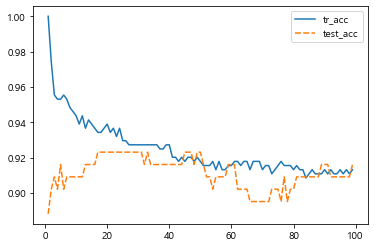

In [52]:
sns.lineplot(data=data_df, palette="tab10")
plt.show()

In [60]:
# 선형모델
from IPython.display import display, Image

In [61]:
### 한글 폰트 설정
import matplotlib
from matplotlib import font_manager, rc
import matplotlib.pyplot as plt
import platform

path = "C:/Windows/Fonts/malgun.ttf"
if platform.system() == "Windows":
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
elif platform.system()=="Darwin":
    rc('font', family='AppleGothic')
else:
    print("Unknown System")
    
matplotlib.rcParams['axes.unicode_minus'] = False

%matplotlib inline

In [63]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
print("numpy 버전 : ", np.__version__)
print("matplotlib 버전 : ", matplotlib.__version__)

numpy 버전 :  1.19.2
matplotlib 버전 :  3.3.2


In [64]:
# 설치가 안되어 있을 경우, 설치 필요.
import mglearn
import sklearn
print("sklearn 버전 : ",  sklearn.__version__)
print("mglearn 버전 : ",  mglearn.__version__)

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

sklearn 버전 :  0.23.2
mglearn 버전 :  0.1.9


w[0]: 0.393906  b: -0.031804


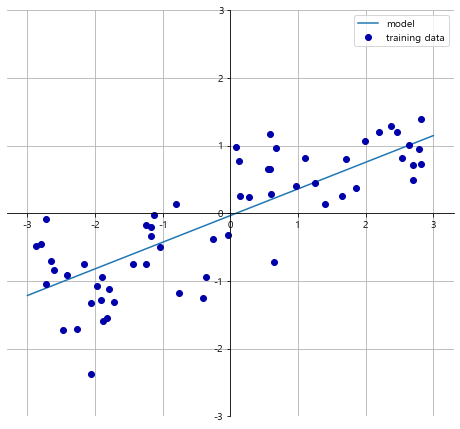

In [65]:
mglearn.plots.plot_linear_regression_wave()

In [66]:
from sklearn.linear_model import LinearRegression
from sklearn.datasets import load_boston

In [68]:
boston=load_boston()
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [69]:
X = boston.data       # 입력 데이터  - 문제
y = boston.target     # 출력 데이터  - 답

In [70]:
X[0]

array([6.320e-03, 1.800e+01, 2.310e+00, 0.000e+00, 5.380e-01, 6.575e+00,
       6.520e+01, 4.090e+00, 1.000e+00, 2.960e+02, 1.530e+01, 3.969e+02,
       4.980e+00])

(array([ 21.,  55.,  82., 154.,  84.,  41.,  30.,   8.,  10.,  21.]),
 array([ 5. ,  9.5, 14. , 18.5, 23. , 27.5, 32. , 36.5, 41. , 45.5, 50. ]),
 <BarContainer object of 10 artists>)

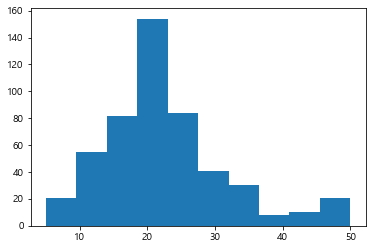

In [72]:
plt.hist(y)

In [73]:
len(y)

506

In [89]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                           test_size=0.3,
                                           random_state=0)

In [91]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((354, 13), (152, 13), (354,), (152,))

In [92]:
### 데이터
### 입력과 출력으로 나눈다.
### 학습용, 테스트용으로 나누어준다. 자체 평가를 위해서
### 좋은 모델을 만들어가기 위해서..
### 모델 선택, 학습, 예측, 평가

In [93]:
from sklearn.linear_model import LinearRegression

In [94]:
model=LinearRegression()
model.fit(X_train, y_train)

#학습 완료 후, 예측
pred=model.predict(X_test)
pred

array([24.9357079 , 23.75163164, 29.32638296, 11.97534566, 21.37272478,
       19.19148525, 20.5717479 , 21.21154015, 19.04572003, 20.35463238,
        5.44119126, 16.93688709, 17.15482272,  5.3928209 , 40.20270696,
       32.31327348, 22.46213268, 36.50124666, 31.03737014, 23.17124551,
       24.74815321, 24.49939403, 20.6595791 , 30.4547583 , 22.32487164,
       10.18932894, 17.44286422, 18.26103077, 35.63299326, 20.81960303,
       18.27218007, 17.72047628, 19.33772473, 23.62254823, 28.97766856,
       19.45036239, 11.13170639, 24.81843595, 18.05294835, 15.59712226,
       26.21043403, 20.81140432, 22.17349382, 15.48367365, 22.62261604,
       24.88561528, 19.74754478, 23.0465628 ,  9.84579105, 24.36378793,
       21.47849008, 17.62118176, 24.39160873, 29.95102691, 13.57219422,
       21.53645439, 20.53306273, 15.03433182, 14.3232289 , 22.11929299,
       17.07321915, 21.54141094, 32.96766968, 31.371599  , 17.7860591 ,
       32.75069556, 18.74795323, 19.21428022, 19.41970047, 23.08

In [95]:
## MSE
dict_dat={"실제값":y_test, "예측값":pred, "오차":y_test-pred}
dat=pd.DataFrame(dict_dat)
dat

,실제값,예측값,오차
0,22.6,24.935708,-2.335708
1,50.0,23.751632,26.248368
2,23.0,29.326383,-6.326383
3,8.3,11.975346,-3.675346
4,21.2,21.372725,-0.172725
...,...,...,...
147,36.2,27.811077,8.388923
148,11.0,14.506816,-3.506816
149,7.2,7.573699,-0.373699
150,22.8,28.334807,-5.534807


In [96]:
dat['오차절대값'] = abs(dat['오차'])
dat['오차제곱'] = dat['오차'] ** (2)
dat

,실제값,예측값,오차,오차절대값,오차제곱
0,22.6,24.935708,-2.335708,2.335708,5.455531
1,50.0,23.751632,26.248368,26.248368,688.976842
2,23.0,29.326383,-6.326383,6.326383,40.023121
3,8.3,11.975346,-3.675346,3.675346,13.508166
4,21.2,21.372725,-0.172725,0.172725,0.029834
...,...,...,...,...,...
147,36.2,27.811077,8.388923,8.388923,70.374032
148,11.0,14.506816,-3.506816,3.506816,12.297756
149,7.2,7.573699,-0.373699,0.373699,0.139651
150,22.8,28.334807,-5.534807,5.534807,30.634086


In [98]:
len(dat['오차제곱'])

152

In [99]:
value=np.mean(dat['오차제곱'])
value

27.19596576688336

In [100]:
value=dat['오차제곱'].sum()/len(dat['오차제곱'])
value

27.19596576688336

In [101]:
np.mean(dat['오차절대값'])

3.6099040603818136

In [103]:
abs(dat['오차']).sum()/len(dat['오차'])

3.6099040603818113